# UG Project
---
#Name: Sanyam Jain
#Roll no. : 22124053


---


# Autoencoders

Autoencoders are neural networks that learn efficient data encodings in an unsupervised manner. They consist of an **encoder** and a **decoder** block.

---
## Table of Contents
1. [Linear Autoencoders](#linear)
2. [Convolutional Autoencoders](#conv)



## <a name="linear"></a>1. Linear Autoencoders

In this section, we use a simple feedforward neural network architecture to create an autoencoder using the **MNIST dataset**.

### Model Architecture
We compress the `28x28` images into a lower-dimensional space and then reconstruct them.

---


In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.07MB/s]


In [3]:

# Define a simple Linear Autoencoder model
class LinearAutoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(LinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)


In [4]:

# Initialize the model, loss function and optimizer
encoding_dim = 64  # change this to 32, 128, or 256 to see the effect
model = LinearAutoencoder(encoding_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [5]:

# Train the model for 5 epochs
num_epochs = 5
for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 0.0255
Epoch [2/5], Loss: 0.0154
Epoch [3/5], Loss: 0.0120
Epoch [4/5], Loss: 0.0087
Epoch [5/5], Loss: 0.0066


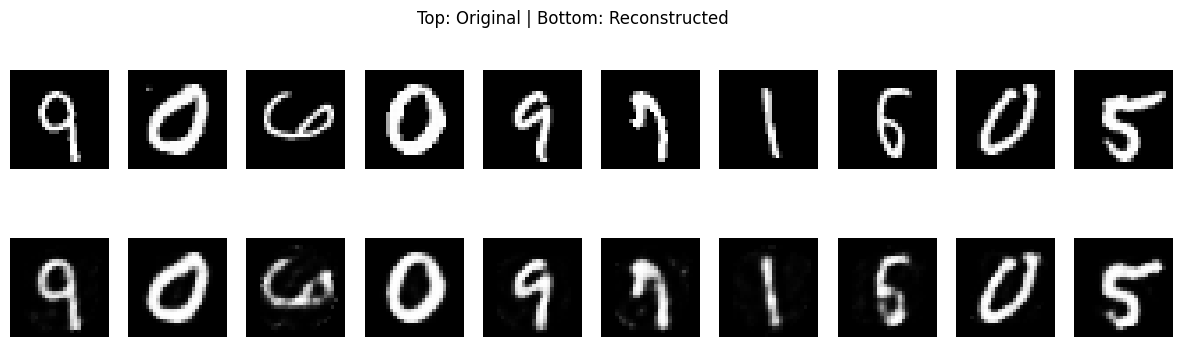

In [6]:

# Visualize the reconstructed images
def show_reconstructed_images(model, loader):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            outputs = model(images)
            break

    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))
    for i in range(10):
        axes[0, i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(outputs[i].cpu().squeeze(), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()

show_reconstructed_images(model, train_loader)



## <a name="conv"></a>2. Convolutional Autoencoders

Linear autoencoders work but aren’t optimal for image data. **Convolutional Autoencoders** use convolutional layers to extract features more efficiently.

### Why Convolutional?
They:
- Preserve spatial locality
- Compress image features more effectively
- Use fewer parameters for better performance

---


In [7]:

# Define the Convolutional Autoencoder model
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),  # -> [B, 64, 28, 28]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # -> [B, 64, 14, 14]
            nn.Conv2d(64, 8, kernel_size=3, stride=1, padding=1),  # -> [B, 8, 14, 14]
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # -> [B, 8, 7, 7]
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 64, kernel_size=2, stride=2),  # -> [B, 64, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),  # -> [B, 1, 28, 28]
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [8]:

# Initialize model, loss function, and optimizer
model = ConvAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [9]:

# Train for 30 epochs
num_epochs = 30
for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/30], Loss: 0.0104
Epoch [2/30], Loss: 0.0087
Epoch [3/30], Loss: 0.0069
Epoch [4/30], Loss: 0.0065
Epoch [5/30], Loss: 0.0062
Epoch [6/30], Loss: 0.0063
Epoch [7/30], Loss: 0.0059
Epoch [8/30], Loss: 0.0059
Epoch [9/30], Loss: 0.0052
Epoch [10/30], Loss: 0.0047
Epoch [11/30], Loss: 0.0053
Epoch [12/30], Loss: 0.0046
Epoch [13/30], Loss: 0.0045
Epoch [14/30], Loss: 0.0043
Epoch [15/30], Loss: 0.0044
Epoch [16/30], Loss: 0.0039
Epoch [17/30], Loss: 0.0043
Epoch [18/30], Loss: 0.0036
Epoch [19/30], Loss: 0.0043
Epoch [20/30], Loss: 0.0036
Epoch [21/30], Loss: 0.0040
Epoch [22/30], Loss: 0.0037
Epoch [23/30], Loss: 0.0039
Epoch [24/30], Loss: 0.0039
Epoch [25/30], Loss: 0.0038
Epoch [26/30], Loss: 0.0034
Epoch [27/30], Loss: 0.0038
Epoch [28/30], Loss: 0.0033
Epoch [29/30], Loss: 0.0034
Epoch [30/30], Loss: 0.0037


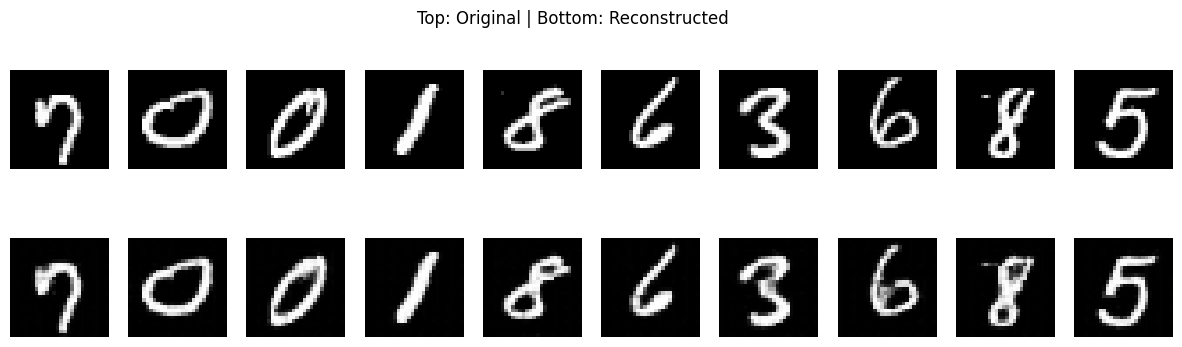

In [10]:

# Visualize reconstructed images
def show_conv_reconstructions(model, loader):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            outputs = model(images)
            break

    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))
    for i in range(10):
        axes[0, i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(outputs[i].cpu().squeeze(), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()

show_conv_reconstructions(model, train_loader)


In [11]:
# 🧮 Compute Compression Ratio (CR)

# Linear: input = 784, output = encoding_dim
CR_linear = encoding_dim / (28 * 28)

# Conv AE Encoder Output Shape:
# Conv1: (1,28,28) → (64,28,28)
# MaxPool: → (64,14,14)
# Conv2: → (8,14,14)
# MaxPool: → (8,7,7) = 392
CR_conv = (8 * 7 * 7) / (28 * 28)

print(f"Compression Ratio - Linear AE: {CR_linear:.4f}")
print(f"Compression Ratio - Conv AE: {CR_conv:.4f}")


Compression Ratio - Linear AE: 0.0816
Compression Ratio - Conv AE: 0.5000


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 dataset (RGB images)
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # [B, 64, 32, 32]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [B, 64, 16, 16]
            nn.Conv2d(64, 8, kernel_size=3, stride=1, padding=1),  # [B, 8, 16, 16]
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # [B, 8, 8, 8]
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 64, kernel_size=2, stride=2),    # [B, 64, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2),    # [B, 3, 32, 32]
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize
model = ConvAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train
num_epochs = 30
for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Visualize
def show_conv_reconstructions(model, loader):
    model.eval()
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            outputs = model(images)
            break

    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))
    for i in range(10):
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))  # Show RGB image
        axes[0, i].axis('off')
        axes[1, i].imshow(outputs[i].cpu().permute(1, 2, 0))
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()

show_conv_reconstructions(model, train_loader)


100%|██████████| 170M/170M [00:18<00:00, 8.99MB/s]


Epoch [1/30], Loss: 0.0087
Epoch [2/30], Loss: 0.0074
Epoch [3/30], Loss: 0.0071
Epoch [4/30], Loss: 0.0069
Epoch [5/30], Loss: 0.0066
Epoch [6/30], Loss: 0.0059
Epoch [7/30], Loss: 0.0061
Epoch [8/30], Loss: 0.0056
Epoch [9/30], Loss: 0.0061
Epoch [10/30], Loss: 0.0058
Epoch [11/30], Loss: 0.0053
Epoch [12/30], Loss: 0.0051
Epoch [13/30], Loss: 0.0058
Epoch [14/30], Loss: 0.0049
Epoch [15/30], Loss: 0.0055
Epoch [16/30], Loss: 0.0054
Epoch [17/30], Loss: 0.0049
Epoch [18/30], Loss: 0.0054
Epoch [19/30], Loss: 0.0050
Epoch [20/30], Loss: 0.0054
Epoch [21/30], Loss: 0.0051
Epoch [22/30], Loss: 0.0051
Epoch [23/30], Loss: 0.0052
Epoch [24/30], Loss: 0.0052
Epoch [25/30], Loss: 0.0046


In [ ]:
input_channels = 3
input_height = 32
input_width = 32

encoded_channels = 8
encoded_height = 8
encoded_width = 8

input_size = input_channels * input_height * input_width
encoded_size = encoded_channels * encoded_height * encoded_width

compression_ratio = encoded_size / input_size

print(f"Compression Ratio (Conv AE, RGB): {compression_ratio:.4f} ({encoded_size}/{input_size})")


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Pick one image and reshape for model input
# image = np.expand_dims(x_test[0], axis=0)  # shape: (1, H, W, C)

# # Run through autoencoder
# reconstructed = autoencoder.predict(image)

# # Plot original and reconstructed
# plt.figure(figsize=(6, 3))
# plt.subplot(1, 2, 1)
# plt.title("Original")
# plt.imshow(image[0].squeeze(), cmap='gray')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title("Reconstructed")
# plt.imshow(reconstructed[0].squeeze(), cmap='gray')
# plt.axis('off')
# plt.tight_layout()
# plt.show()
